scikit-learn 是基于 Python 语言的机器学习工具简单高效的数据挖掘和数据分析工具。

## 一、获取数据

1.导入sklearn的数据集模块  
2.导入预置的手写数字数据集  
3.生成数据用于聚类，100个样本，2个特征，5个类  

In [3]:
from sklearn import datasets


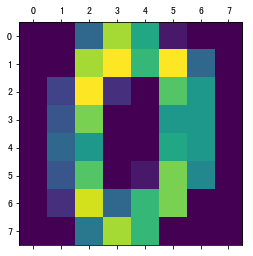

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
digits = datasets.load_digits()

plt.matshow(digits.images[0])
plt.show()


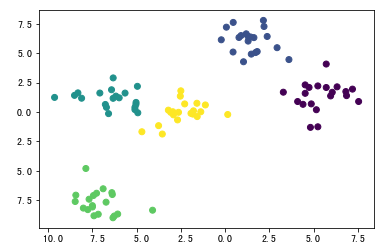

In [5]:
data, label = datasets.make_blobs(n_samples=100, n_features=2, centers=5)

plt.scatter(data[:, 0], data[:, 1], c=label)
plt.show()


## 二、数据预处理

4.导入sklearn的预处理模块  
5.计算一组数据的平均值和标准差（scaler）  
6.使用上一题的scaler标准化现有数据  
7.用最小最大规范化对数据进行线性变换，变换到[0,1]区间  
8.用L2正则化对数据进行变换 
9.对现有数据进行one-hot编码  
10.给定阈值，将特征转换为0/1  
11.对现有数据进行标签编码  

In [6]:
from sklearn import preprocessing

In [7]:
data = [[0, 0], [1, 0], [-1, 1], [1, 2]]

scalerstd = preprocessing.StandardScaler().fit(data)

print(scalerstd.mean_)
print(scalerstd.var_)

[0.25 0.75]
[0.6875 0.6875]


In [8]:
scalerstd.transform(data)

array([[-0.30151134, -0.90453403],
       [ 0.90453403, -0.90453403],
       [-1.50755672,  0.30151134],
       [ 0.90453403,  1.50755672]])

In [9]:
scalermm = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(data)
scalermm.transform(data)

array([[0.5, 0. ],
       [1. , 0. ],
       [0. , 0.5],
       [1. , 1. ]])

In [10]:
X = [[ 1., -1.,  2.],
    [ 2.,  0.,  0.],
    [ 0.,  1., -1.]]
    
scalernorm = preprocessing.Normalizer(norm='l2').fit(X)
scalernorm.transform(X)

# 方法二
# preprocessing.normalize(X, norm='l2')

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [11]:
data = [[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]]

scaleronehot = preprocessing.OneHotEncoder().fit(data)
scaleronehot.transform(data).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

In [12]:
data = [[0, 0], [1, 0], [-1, 1], [1, 2]]

scalerbin = preprocessing.Binarizer(threshold=0.5)
scalerbin.transform(data)

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [13]:
scalerlabel = preprocessing.LabelEncoder()
scalerlabel.fit(["paris", "paris", "tokyo", "amsterdam"])
scalerlabel.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

## 三、数据及拆分
12.将现有数据划分为训练集和测试集，测试集数量占比为30%  
13.将现有数据划分为3折

In [14]:
from sklearn import model_selection

dataset = datasets.load_boston()
print(dataset.data.shape)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    dataset['data'], dataset['target'], test_size=0.3)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(506, 13)
(354, 13) (152, 13) (354,) (152,)


In [15]:
import numpy as np
X = np.array(['a', 'b', 'c', 'd','e','f'])

kfold = model_selection.KFold(n_splits=3)

for train, test in kfold.split(X):
    print("%s %s" % (X[train], X[test]))

['c' 'd' 'e' 'f'] ['a' 'b']
['a' 'b' 'e' 'f'] ['c' 'd']
['a' 'b' 'c' 'd'] ['e' 'f']


## 四、使用模型
14.定义一个线性回归模型   
15.导入预置的波士顿房价数据集   
16.设置房价为Y，剩余参数为X，30%为测试集 
17.用线性回归模型拟合波士顿房价数据集  
18.用训练完的模型进行预测  
19.输出线性回归模型的斜率和截距  


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, normalize=False,
    copy_X=True, n_jobs=1)

In [17]:
X, y = datasets.load_boston(return_X_y=True)


In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [19]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
model.predict(X_test)

array([26.25992442,  9.33883098, 21.75140576, 22.37604127, 20.35694029,
       33.60313065, 32.74481597, 22.42294065, 19.77760437, -1.16132012,
       17.42166101, 23.90283624, 22.91482041, 33.33912062, 24.90583361,
       27.07570535, 22.50942758, 24.27950142, 23.14308679, 20.4519883 ,
       21.18500858, 22.71856646, 28.96456539, 15.1816301 , 16.11395526,
        4.45492848,  7.63407352, 23.21888697, 30.06713783, 15.66697326,
        1.91385942, 19.5744595 , 18.36044805, 14.97085203, 33.07583387,
       28.99710169, 17.08602777, 17.68206796, 24.38433921, 31.84395163,
       27.17738463, 14.21843726, 19.80308011, 28.59901009, 24.97776751,
       26.02398851, 16.91294041, 17.42587988,  0.55902561, 25.3388113 ,
       36.41874456, 23.59401747, 17.72416277, 16.14813729, 28.00989384,
       17.35799279, 36.41708025, 29.18561542, 23.79300249,  6.29263901,
       17.60820019, 19.95362871, 31.42198875,  9.8463655 , 19.82505449,
       17.07264779, 12.38176939, 12.07088755, 42.85010741, 13.27

In [21]:
print(model.coef_)
print(model.intercept_)


[-5.00288043e-02  3.56568764e-02  6.93465436e-02  2.16769447e+00
 -1.52079455e+01  4.15011712e+00 -2.37994210e-03 -1.13384381e+00
  2.83383718e-01 -1.69703242e-02 -8.63184202e-01  7.58941210e-03
 -5.24753110e-01]
31.871833311681854


## 五、评估
20.使用随机森林对鸢尾花数据集进行预测，`n_estimators=100`  
21.给产生的随机森林模型打分  
22.输出模型的recision_score、recall_score、f1_score

In [22]:
from sklearn.ensemble import RandomForestClassifier
X,y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0,
       2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0,
       2])

In [23]:
clf.score(X,y)

0.9866666666666667

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45



23.使用手写数字数据集，随机森林算法进行分类，画出学习曲线  
24.使用手写数字数据集，随机森林算法进行分类，参数n_estimators选择范围为`[10,20,40,80,160,250]`，画出验证曲线  

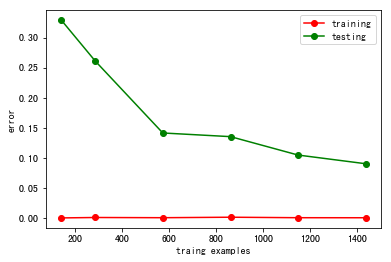

In [25]:
from sklearn.model_selection import learning_curve

X,y = datasets.load_digits(return_X_y=True)

train_sizes,train_score,test_score = learning_curve(RandomForestClassifier(n_estimators = 10),X,y,train_sizes=[0.1,0.2,0.4,0.6,0.8,1],scoring='accuracy')

train_error =  1- np.mean(train_score,axis=1)
test_error = 1- np.mean(test_score,axis=1)

plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('error')
plt.show()


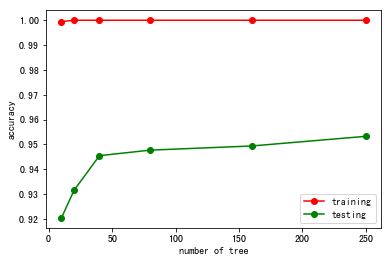

In [26]:
from sklearn.model_selection import validation_curve

X,y = datasets.load_digits(return_X_y=True)
param_range = [10,20,40,80,160,250]

train_score,test_score = validation_curve(RandomForestClassifier(),X,y,param_name='n_estimators',param_range=param_range,cv=10,scoring='accuracy')

train_score =  np.mean(train_score,axis=1)
test_score = np.mean(test_score,axis=1)

plt.plot(param_range,train_score,'o-',color = 'r',label = 'training')
plt.plot(param_range,test_score,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('number of tree')
plt.ylabel('accuracy')
plt.show()


25.使用网格搜索，得手写数字数据集+随机森林算法的最优参数

In [27]:
from sklearn.model_selection import GridSearchCV
X,y = datasets.load_digits(return_X_y=True)
# 随机森林的参数
tree_param_grid={'min_samples_split':[3,6,9],'n_estimators':[10,50,100]}
grid=GridSearchCV(RandomForestClassifier(),param_grid=tree_param_grid,cv=5)
grid.fit(X,y)
grid.best_estimator_,grid.best_score_,grid.best_params_

(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=3,
                        min_weight_fraction_leaf=0.0, n_estimators=50,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 0.9360290931600124,
 {'min_samples_split': 3, 'n_estimators': 50})

26.取鸢尾花数据集中，类型=0,1的数据，变成一个二分类问题，使用线性内核的SVM进行拟合   
27.计算出对应的ROC曲线  
28.计算出对应的AUC  

In [28]:
from sklearn import svm
X,y = datasets.load_iris(return_X_y=True)
X, y = X[y != 2], y[y != 2]

# 加一些噪音，不然模型太准了
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3,random_state=0)

svm = svm.SVC(kernel='linear', probability=True)

svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

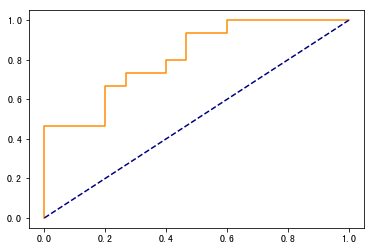

In [29]:
from sklearn.metrics import roc_curve, auc

y_score = svm.decision_function(X_test)

fpr,tpr,threshold = roc_curve(y_test, y_score)

plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

In [30]:
roc_auc = auc(fpr,tpr) 
roc_auc

0.8133333333333334

## 六、降维

29.生成一组数据，10000个样本，3个特征，4个簇  
30.对数据进行pca同纬度数量的投影，展示投影后的三个维度的分布  
31.将3维数据降到2维  
32.指定降维后主成分方差的比例（99%）进行降维  
33.使用MLE算法，自动选择降维维度

/usr/local/lib/python3.5/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


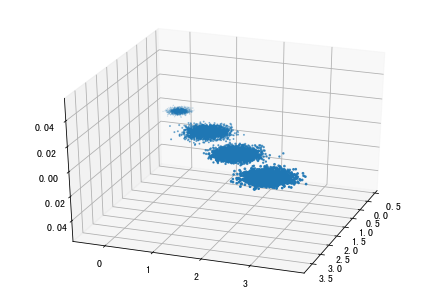

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

X, y = datasets.make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

In [32]:
pca = PCA(n_components=3)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)


[0.98318212 0.00850037 0.00831751]
[3.78521638 0.03272613 0.03202212]


[0.98318212 0.00850037]
[3.78521638 0.03272613]


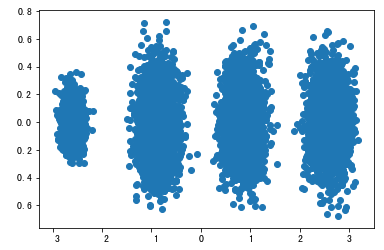

In [33]:
pca = PCA(n_components=2)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)

X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

In [34]:
pca = PCA(n_components=0.99)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

[0.98318212 0.00850037]
[3.78521638 0.03272613]
2


In [35]:
pca = PCA(n_components='mle')
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

[0.98318212]
[3.78521638]
1


34.生成一组数据，10000个样本，3个特征，4个类别  
35.对数据进行LDA降维

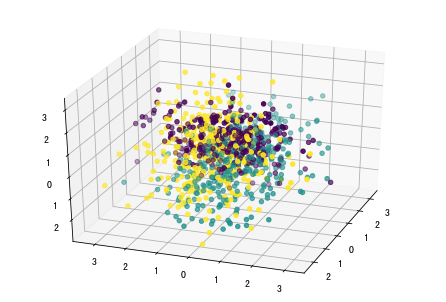

In [36]:
X2, y2 = datasets.make_classification(n_samples=1000, n_features=3, n_redundant=0, n_classes=3, n_informative=2,
                           n_clusters_per_class=1,class_sep =0.5, random_state =10)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2],marker='o',c=y2)

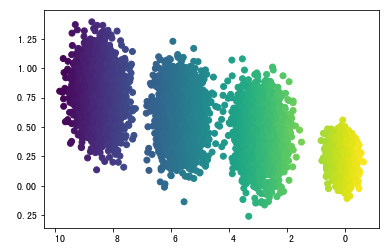

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X2,y2)
X2_new = lda.transform(X)
plt.scatter(X2_new[:, 0], X2_new[:, 1],marker='o',c=X2_new[:, 0])
plt.show()